In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import sklearn
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

#from sklearn.datasets import load_boston


In [2]:

raw_data = {'total_floor_area': [685, 700, 800, 500, 700, 650, 600, 850, 1000, 900],
        'co2_emissions': [3.2, 4.5, 3.0, 2.7, 5.0, 3.5, 3.0, 2.75, 3.8, 3.1],
        'current_energy_efficiency': [60, 70, 65, 90, 89, 90, 75, 70, 80, 90],
        'pot_energy_efficiency': [90, 95, 100, 90, 95, 100, 89, 90, 101, 90],
        'distance_to_metro': [500, 125, 300, 2000, 200, 250, 350, 150, 50, 275],  
        'solar_heating': [0, 0, 0, 1, 0, 0, 0, 1, 1, 0],            
        'value': [200000.00, 250000.00, 280000.00, 195000.00, 250000.00, 240000.00, 250000.00, 330000.00, 400000.00, 300000.00],
        }
df_orig = pd.DataFrame(raw_data, columns = ['co2_emissions', 'total_floor_area', 'current_energy_efficiency',
        'pot_energy_efficiency', 'distance_to_metro','solar_heating', 'value'])


In [3]:
df_orig

,co2_emissions,total_floor_area,current_energy_efficiency,pot_energy_efficiency,distance_to_metro,solar_heating,value
0,3.20,685,60,90,500,0,200000.0
1,4.50,700,70,95,125,0,250000.0
2,3.00,800,65,100,300,0,280000.0
3,2.70,500,90,90,2000,1,195000.0
4,5.00,700,89,95,200,0,250000.0
5,3.50,650,90,100,250,0,240000.0
6,3.00,600,75,89,350,0,250000.0
7,2.75,850,70,90,150,1,330000.0
8,3.80,1000,80,101,50,1,400000.0
9,3.10,900,90,90,275,0,300000.0


In [4]:
df_x = pd.DataFrame(raw_data, columns = ['co2_emissions', 'total_floor_area', 'current_energy_efficiency',
        'pot_energy_efficiency', 'distance_to_metro','solar_heating'])

df_y = pd.DataFrame(raw_data, columns = ['value'])


In [5]:

def manually_split_data(df_x, df_y, split_pos):
    # Manually split data
    X_train = df_x[:split_pos]
    X_test = df_x[split_pos:]
    Y_train = df_y[:split_pos]
    Y_test = df_y[split_pos:]
    return X_train, X_test, Y_train, Y_test
    

In [6]:
X_train, X_test, Y_train, Y_test = manually_split_data(df_x, df_y, 7)

In [7]:
print(X_train.shape)
print(type(X_train))
X_train

(7, 6)
<class 'pandas.core.frame.DataFrame'>


,co2_emissions,total_floor_area,current_energy_efficiency,pot_energy_efficiency,distance_to_metro,solar_heating
0,3.2,685,60,90,500,0
1,4.5,700,70,95,125,0
2,3.0,800,65,100,300,0
3,2.7,500,90,90,2000,1
4,5.0,700,89,95,200,0
5,3.5,650,90,100,250,0
6,3.0,600,75,89,350,0


In [8]:
print(X_test.shape)
X_test.head()

(3, 6)


,co2_emissions,total_floor_area,current_energy_efficiency,pot_energy_efficiency,distance_to_metro,solar_heating
7,2.75,850,70,90,150,1
8,3.80,1000,80,101,50,1
9,3.10,900,90,90,275,0


In [9]:
print(Y_train.shape)
Y_train.head()

(7, 1)


,value
0,200000.0
1,250000.0
2,280000.0
3,195000.0
4,250000.0


In [10]:
print(Y_test.shape)
Y_test.head()

(3, 1)


,value
7,330000.0
8,400000.0
9,300000.0


In [11]:
# Run Simple linear regression model
reg = linear_model.LinearRegression()
reg.fit(X_train,Y_train)
Y_predict = reg.predict(X_test)

In [12]:
print(reg.coef_, '   ', reg.intercept_)   # Length of 6 features plus 1 target variable

[[-4.96807951e+04  6.33551779e+02  2.56017954e+03 -7.90702148e+03
  -3.17373517e+02  4.86621571e+05]]     [641703.49470984]


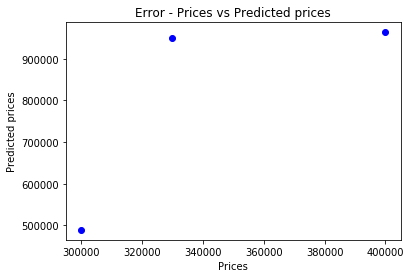

In [13]:
plt.scatter(Y_test, Y_predict, color='blue')
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Error - Prices vs Predicted prices")
plt.show()

In [14]:
error = np.mean((Y_predict - Y_test)**2)
print(error)
print('Mean Squared Error: ' + "{:.2f}".format(float(error)))

value    2.459879e+11
dtype: float64
Mean Squared Error: 245987945864.80


# TEST

In [15]:
df_x.columns

Index(['co2_emissions', 'total_floor_area', 'current_energy_efficiency',
       'pot_energy_efficiency', 'distance_to_metro', 'solar_heating'],
      dtype='object')

In [16]:
# Separate data by feature
df_co2_emissions = df_x['co2_emissions']
df_total_floor_area = df_x['total_floor_area']
df_current_energy_efficiency = df_x['current_energy_efficiency']
df_pot_energy_efficiency = df_x['pot_energy_efficiency']
df_distance_to_metro = df_x['distance_to_metro']
df_solar_heating = df_x['solar_heating']


In [17]:

def build_models(df_X):
    X_train, X_test, Y_train, Y_test = manually_split_data(df_X, df_y, 7)
    reg = linear_model.LinearRegression()
    X_train2 = np.array(X_train).reshape(-1, 1)
    reg.fit(X_train2, Y_train)
    X_test2 = np.array(X_test).reshape(-1, 1)
    Y_predict = reg.predict(X_test2)
    print(reg.coef_, '   ', reg.intercept_)   # Length of 1 feature plus 1 target variable
    return reg

In [18]:
reg_co2_emissions = build_models(df_co2_emissions)
reg_total_floor_area = build_models(df_total_floor_area)
reg_current_energy_efficiency = build_models(df_current_energy_efficiency)
reg_pot_energy_efficiency = build_models(df_pot_energy_efficiency)
reg_distance_to_metro = build_models(df_distance_to_metro)
reg_solar_heating = build_models(df_solar_heating)

[[10961.53846154]]     [198865.38461538]
[[228.34485563]]     [86660.22773485]
[[-366.73553719]]     [266095.77922078]
[[4219.43231441]]     [-159372.27074236]
[[-32.0459075]]     [254910.14363274]
[[-50000.]]     [245000.]


In [19]:
X_train, X_test, Y_train, Y_test = manually_split_data(df_x, df_y, 7)
X_test

,co2_emissions,total_floor_area,current_energy_efficiency,pot_energy_efficiency,distance_to_metro,solar_heating
7,2.75,850,70,90,150,1
8,3.80,1000,80,101,50,1
9,3.10,900,90,90,275,0


In [23]:
df2 = pd.DataFrame(columns=X_test.columns)
df2 = df2.append(X_test.iloc[1].copy(), ignore_index=True)
print(df2.shape)
df2.head()
print(reg.coef_, '   ', reg.intercept_)   # Length of 1 feature plus 1 target variable
print('Original reg model prediction = ', reg.predict(df2))


(1, 6)
[[-4.96807951e+04  6.33551779e+02  2.56017954e+03 -7.90702148e+03
  -3.17373517e+02  4.86621571e+05]]     [641703.49470984]
Original reg model prediction =  [[963426.34177621]]


In [34]:
df2 = pd.DataFrame(columns=X_test.columns)
df2 = df2.append(X_test.iloc[1].copy(), ignore_index=True)
print(df2.shape)
print('df2 = \n', df2) 
#df2.head()

#print(reg_co2_emissions.coef_, '   ', reg_co2_emissions.intercept_)
x1 = reg_co2_emissions.predict(np.array(df2['co2_emissions'].iloc[0]).reshape(-1,1))
x2 = reg_total_floor_area.predict(np.array(df2['total_floor_area'].iloc[0]).reshape(-1,1))
x3 = reg_current_energy_efficiency.predict(np.array(df2['current_energy_efficiency'].iloc[0]).reshape(-1,1))
x4 = reg_pot_energy_efficiency.predict(np.array(df2['pot_energy_efficiency'].iloc[0]).reshape(-1,1))
x5 = reg_distance_to_metro.predict(np.array(df2['distance_to_metro'].iloc[0]).reshape(-1,1))
x6 = reg_solar_heating.predict(np.array(df2['solar_heating'].iloc[0]).reshape(-1,1))
  
x_total = x1 + x2 + x3 + x4 + x5 + x6


print('1. Hedonic reg models prediction = ', x_total)

# Subtract intercept values...hmmmmm
x_total = x_total - reg_co2_emissions.intercept_
x_total = x_total - reg_total_floor_area.intercept_
x_total = x_total - reg_current_energy_efficiency.intercept_
x_total = x_total - reg_pot_energy_efficiency.intercept_
x_total = x_total - reg_distance_to_metro.intercept_
x_total = x_total - reg_solar_heating.intercept_

print('2. Hedonic reg models prediction = ', x_total)



(1, 6)
df2 = 
    co2_emissions  total_floor_area  current_energy_efficiency  \
0            3.8            1000.0                       80.0   

   pot_energy_efficiency  distance_to_metro  solar_heating  
0                  101.0               50.0            1.0  
1. Hedonic reg models prediction =  [[1507379.49165298]]
2. Hedonic reg models prediction =  [[615220.22719158]]


In [ ]:
#reg.predict([[3.8]])

In [31]:
Y_test.iloc[1]

value    400000.0
Name: 8, dtype: float64